In [1]:
from sklearn import svm
import numpy as np
import csv
import matplotlib.pyplot as plt


In [2]:
def make_meshgrid(x, y, h = 0.2):
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() -1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, *params)

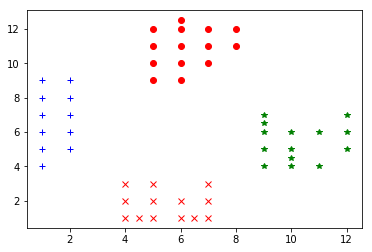

In [7]:
data = list(csv.reader(open('multi_class_svm.csv')))
npdata = np.array(data)
floatdata = npdata.astype(np.float)

X = np.array(list(zip(floatdata[:, 0], floatdata[:, 1])))
Y = floatdata[:, 2]

Y_1 = np.where(Y == 1, 1, -1)
Y_2 = np.where(Y == 2, 1, -1)
Y_3 = np.where(Y == 3, 1, -1)
Y_4 = np.where(Y == 4, 1, -1)

for i in range(len(X)):
    if Y[i] == 1:
        plt.plot(X[i, 0], X[i, 1], 'b+', label = 'FI')
    elif Y[i] == 2:
        plt.plot(X[i, 0], X[i, 1], 'rx', label = 'S')
    elif Y[i] == 3:
        plt.plot(X[i, 0], X[i, 1], 'g*', label = 'T')
    else:
        plt.plot(X[i, 0], X[i, 1], 'ro', label = 'FO')

plt.show()

6
6
Class: [-1]
Class: [-1]
Class: [-1]
Class: [-1]


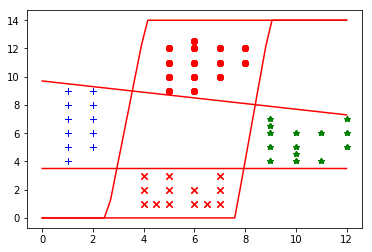

In [19]:
Y_list = [Y_1, Y_2, Y_3, Y_4]
a = float(input())
b = float(input())

######################################
#       One vs ALL                  #
#####################################
for i in range(4):
    clf = svm.SVC(kernel = 'linear', C = 1000)
    clf.fit(X, Y_list[i])
    #weight and bias of the hyperplane
    W = clf.coef_[0]
    bias = clf.intercept_[0]
    xx = np.linspace(0,12)
    yy = -bias/W[1] - xx * W[0]/W[1]
    
    for i in range(len(yy)):
        if yy[i] < 0:
            yy[i] = 0
        elif yy[i] > 14:
            yy[i] = 14
    
    for i in range(len(X)):
        if Y[i] == 1:
            plt.plot(X[i, 0], X[i, 1], 'b+', label = 'FI')
        elif Y[i] == 2:
            plt.plot(X[i, 0], X[i, 1], 'rx', label = 'S')
        elif Y[i] == 3:
            plt.plot(X[i, 0], X[i, 1], 'g*', label = 'T')
        else:
            plt.plot(X[i, 0], X[i, 1], 'ro', label = 'FO')

    result = clf.predict([[a, b]])
    print('One vs ALL')
    print("Class:", result)

    plt.plot(xx, yy, color = "red")
plt.show()

In [23]:
#########################
#       One vs One      #
#########################
#By default SVC uses One vs One
clf.fit(X, Y)
print('One vs One Prediction', clf.predict([[a, b]]))
#class1 vs class2 -> class2
#class1 vs 3 -> class1
#class1 vs 4 -> class4
#class2 vs class4-> class2
#class3 vs class4 -> class2
#argmax = class2

One vs One Prediction [ 2.]
